Ë©≤ import ÁöÑÊù±Ë•øÈÉΩÂ∑Æ‰∏çÂ§ö import ÂÆå‰∫ÜÔºåÊâÄ‰ª•ÂèØ‰ª•Áõ¥Êé•Ë§áË£ΩÈÄôÂÄãÊ™îÊ°à‰ΩúÁÇ∫ÈñãÈ†≠ sectionÔºåÁõ¥Êé•ÈñãÂßãÂæåÈù¢ÁöÑÂàÜÊûê„ÄÇ

In [1]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.dates as mpl_dates
%matplotlib inline

import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 100

import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson as sdw
import statsmodels.stats.libqsturng
import plotly.express as px
from datetime import datetime

import stemgraphic as stem

# from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

# from mgt2001 import *

import mgt2001
from mgt2001.hyp.ind import two_population, two_population_proportion
import mgt2001.hyp.anova as anova
import mgt2001.hyp.chi2 as chi2
import mgt2001.hyp.non as non

import random
import itertools
import math

plt.style.use('ggplot') # refined style

mgt2001.__version__ # show version of mgt2001

'0.4.1.4'

## Data Processing

In [2]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', engine='openpyxl', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

display(movie_df.head())
display(movie_df.tail())

id                 title    budget  \
0   4234              Scream 3  40000000   
1   1907             The Beach  40000000   
2  15655      The Tigger Movie  30000000   
3  14181           Boiler Room   7000000   
4   2069  The Whole Nine Yards  41300000   

                                          genres original_language  \
0                          ['Horror', 'Mystery']                en   
1  ['Drama', 'Adventure', 'Romance', 'Thriller']                en   
2              ['Family', 'Animation', 'Comedy']                en   
3                 ['Crime', 'Drama', 'Thriller']                en   
4                            ['Comedy', 'Crime']                en   

                                production_companies release_date  \
0  ['Craven-Maddalena Films', 'Dimension Films', ...   2000-02-03   
1                                  ['Figment Films']   2000-02-03   
2  ['Disney Television Animation', 'DisneyToon St...   2000-02-11   
3                                ['New Line Cinema']   2000-02-18   
4  ['Franchise Pictures', 'Morgan Creek Productio...   2000-02-18   

  TW_release_date    revenue  runtime  ... rating  rotten_aud_score  \
0             NaN  161834276      116  ...      R              37.0   
1             NaN  144056873      119  ...      R              57.0   
2             NaN   45554533       77  ...      G              62.0   
3             NaN   28780255      118  ...      R              78.0   
4             NaN  106371651       98  ...      R              64.0   

    zh_title                belongs_to_collection  has_homepage  \
0  È©öËÅ≤Â∞ñÂè´3ÔºöÁµÇÁµêÁØá                    Scream Collection             0   
1         Êµ∑ÁÅò                                  NaN             0   
2     Ë∑≥Ë∑≥ËôéÊ≠∑Èö™Ë®ò                                  NaN             1   
3      Êê∂Èå¢Â§ß‰ΩúÊà∞                                  NaN             0   
4      ÊÆ∫Êâã‰∏çÁú®Áúº  The Whole Nine/Ten Yards Collection             0   

   has_collection pre_covid  post_covid  release_year  release_month  
0               1         1           0          2000              2  
1               0         1           0          2000              2  
2               0         1           0          2000              2  
3               0         1           0          2000              2  
4               1         1           0          2000              2  

[5 rows x 33 columns]

id                    title     budget  \
3167  460465            Mortal Kombat   20000000   
3168  637649             Wrath of Man   40000000   
3169  520663  The Woman in the Window    4000000   
3170  503736         Army of the Dead   90000000   
3171  337404                  Cruella  200000000   

                                  genres original_language  \
3167  ['Action', 'Fantasy', 'Adventure']                en   
3168                 ['Action', 'Crime']                en   
3169    ['Crime', 'Mystery', 'Thriller']                en   
3170    ['Action', 'Horror', 'Thriller']                en   
3171                 ['Comedy', 'Crime']                en   

                                   production_companies release_date  \
3167  ['Atomic Monster', 'Broken Road Productions', ...   2021-04-07   
3168  ['Miramax', 'Metro-Goldwyn-Mayer', 'Toff Guy F...   2021-04-22   
3169  ['Fox 2000 Pictures', 'Scott Rudin Productions...   2021-05-14   
3170                               ['The Stone Quarry']   2021-05-14   
3171                           ['Walt Disney Pictures']   2021-05-26   

               TW_release_date   revenue  runtime  ... rating  \
3167                       NaN  76706000      110  ...      R   
3168  2021-04-29T00:00:00.000Z  80648577      119  ...      R   
3169                       NaN         0      102  ...      R   
3170                       NaN    780000      148  ...    NaN   
3171                       NaN  46586903      134  ...  PG-13   

      rotten_aud_score  zh_title        belongs_to_collection  has_homepage  \
3167              86.0      Áúü‰∫∫Âø´Êâì                          NaN             1   
3168              91.0      Áé©ÂëΩÈàîÂä´                          NaN             1   
3169              36.0        Á™∫Êé¢                          NaN             1   
3170               NaN      Ê¥ªÂ±çÂ§ßËªç  Army of the Dead Collection             1   
3171              97.0  ÊôÇÂ∞öÊÉ°Â•≥ÔºöÂ∫´‰ºäÊãâ           Cruella Collection             1   

      has_collection pre_covid  post_covid  release_year  release_month  
3167               0         0           1          2021              4  
3168               0         0           1          2021              4  
3169               0         0           1          2021              5  
3170               1         0           1          2021              5  
3171               1         0           1          2021              5  

[5 rows x 33 columns]

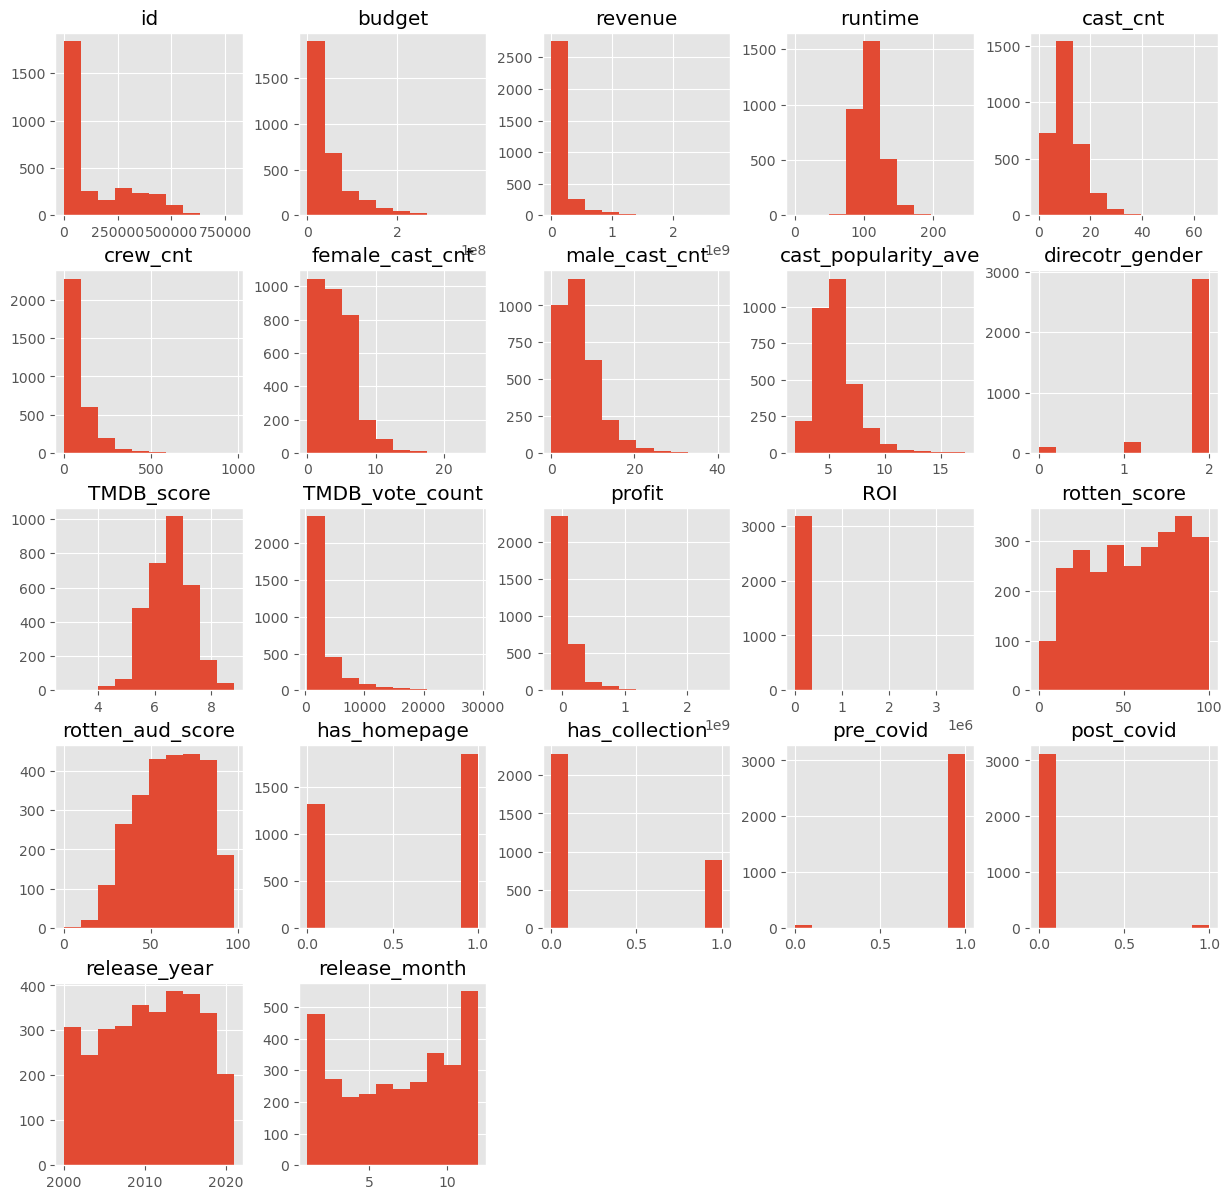

In [3]:
movie_df.hist(figsize=(15, 15))
plt.show()

ÂèØ‰ª•ÁúãÂá∫Ë£°Èù¢ÊúâÈúÄÂ§ö outliersÔºåÈÄô‰∫õ data points ÂæàÂèØËÉΩÂΩ±ÈüøÂà∞Êï¥È´îÁµêÊûúÔºåÊâÄ‰ª•ÊàëÂÄëÂ∞á‰∏çËÄÉÊÖÆÈÄô‰∫õÈõªÂΩ±ÁöÑË®àÁÆó„ÄÇ

Âú®ÈÄôÈÇäÔºåÊàëÂÄë‰πüÂèØ‰ª•ÁúãÂà∞ "revenue"„ÄÅ"budget"„ÄÅ"ROI" ÈÄô‰∏âÂÄãÈáçÈªûÈ†ÖÁõÆÈÉΩ‰∏çÊòØÂ∏∏ÊÖãÂàÜ‰ΩàÔºåË¶ÅÂÅöÂàÜÊûêÁöÑË©±ÊúÉÊúâÈªûÂõ∞Èõ£„ÄÇÈÄôÊôÇÂÄôÔºåÊàëÂÄëÂèØ‰ª•Êé°Áî® `np.log1p()` ‰æÜÂÅö data transformation„ÄÇÂ¶ÇË¶ÅË¶ÅÂÅöÈ†êÊ∏¨ÁöÑË©±ÔºåÂâáÊòØÁî® `np.exp1p()` ‰æÜÈÇÑÂéü„ÄÇÈÄôÈÉ®ÂàÜÔºåÊúÉÂú®ÂéªÈô§Áé©Áï∞Ë≥™‰πãÂæåÁµ±‰∏ÄËôïÁêÜ„ÄÇ

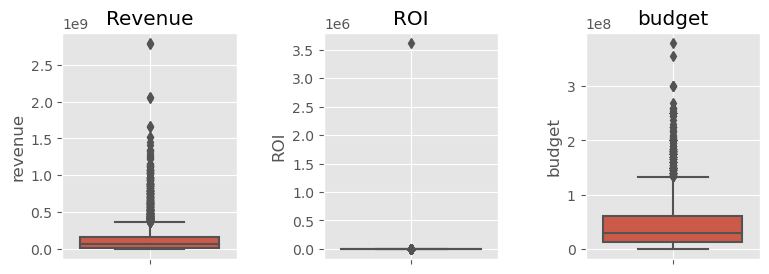

In [4]:
# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

<div class="alert alert-block alert-info">
<b>‰Ω†Áü•ÈÅìÂóéÔºü</b> Á•®ÊàøÊúÄÈ´òÁöÑÈõªÂΩ±ÊòØ 2019 Âπ¥‰∏äÊò†ÁöÑÂæ©‰ªáËÄÖËÅØÁõüÔºöÁµÇÂ±Ä‰πãÊà∞„ÄÇ</div>

In [5]:
movie_df[movie_df['revenue'] == movie_df['revenue'].max()]

id              title     budget  \
3005  299534  Avengers: Endgame  356000000   

                                          genres original_language  \
3005  ['Adventure', 'Science Fiction', 'Action']                en   

     production_companies release_date           TW_release_date     revenue  \
3005   ['Marvel Studios']   2019-04-24  2019-04-24T00:00:00.000Z  2797800564   

      runtime  ... rating  rotten_aud_score    zh_title  \
3005      181  ...  PG-13              90.0  Âæ©‰ªáËÄÖËÅØÁõüÔºöÁµÇÂ±Ä‰πãÊà∞   

        belongs_to_collection  has_homepage  has_collection pre_covid  \
3005  The Avengers Collection             1               1         1   

      post_covid  release_year  release_month  
3005           0          2019              4  

[1 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2248 non-null   int64         
 1   title                  2248 non-null   object        
 2   budget                 2248 non-null   int64         
 3   genres                 2248 non-null   object        
 4   original_language      2248 non-null   object        
 5   production_companies   2248 non-null   object        
 6   release_date           2248 non-null   datetime64[ns]
 7   TW_release_date        500 non-null    object        
 8   revenue                2248 non-null   int64         
 9   runtime                2248 non-null   int64         
 10  cast                   2248 non-null   object        
 11  cast_cnt               2248 non-null   int64         
 12  crew_cnt               2248 non-null   int64         
 13  fem

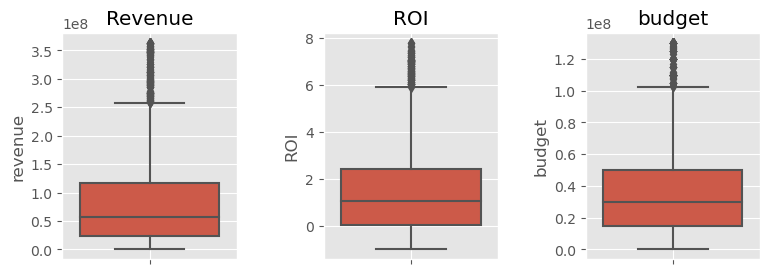

In [6]:
rev_outlier = mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0]
roi_outlier = mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0]
budget_outlier = mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # ÊéíÈô§ 90 Ëê¨‰ª•‰∏ãÁ•®ÊàøÁöÑË≥áÊñôÈªûÔºàÈÄô‰∫õÈªûÊ≤íÊúâË¢´ÁßªÈô§Ôºâ
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # ÊéíÈô§ 90 Ëê¨‰ª•‰∏ãÁ•®ÊàøÁöÑË≥áÊñôÈªûÔºàÈÄô‰∫õÈªûÊ≤íÊúâË¢´ÁßªÈô§Ôºâ
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

ÈÄôÊòéÈ°ØÂ∑≤Á∂ìËºÉ‰∏äÈù¢ÊâÄÁúãÂà∞ÁöÑ box plots Â•Ω‰∏äË®±Â§ö„ÄÇÂõ†Ê≠§ÊàëÂÄë‰æøÁî®Ââ©‰∏ãÁöÑ 2248 Á≠ÜË≥áÊñôÈÄ≤Ë°åÊõ¥Ëøë‰∏ÄÊ≠•ÁöÑÂàÜÊûê„ÄÇÂè¶Â§ñÔºåÂú®ÈÄôÈÇä‰πüË¶ÅÊ≥®ÊÑèÂà∞Ôºå‰∏çÊòØÊâÄÊúâÁöÑ column ÈÉΩÊòØ 2248 Á≠ÜË≥áÊñôÔºåÊúâ‰∫õ data ÊòØÊúâÂ∞ëÁöÑ„ÄÇÊâÄ‰ª•Âú®ÂÅöÂàÜÊûêÊôÇË¶ÅÊ†ºÂ§ñÂ∞èÂøÉ„ÄÇ

In [7]:
u_movie_df['log_revenue'] = np.log1p(u_movie_df['revenue'])
u_movie_df['log_budget'] = np.log1p(u_movie_df['budget'])
u_movie_df['log_ROI'] = np.log1p(u_movie_df['ROI'])

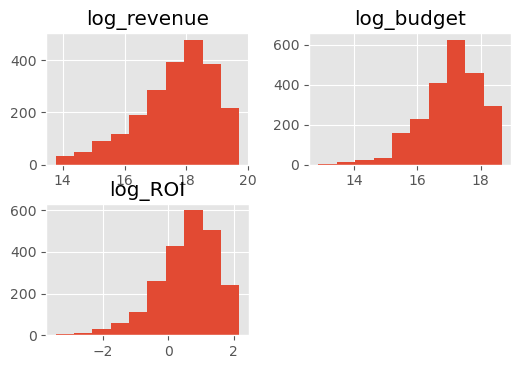

In [8]:
u_movie_df[['log_revenue', 'log_budget', 'log_ROI']].hist()
plt.show()

ÊàëÂÄëÂ∞çrevenue„ÄÅbudget„ÄÅROI‰∏âÈ†ÖËÆäÊï∏ÂèñÂ∞çÊï∏Ôºå‰ΩøÈÄô‰∏âÈ†ÖËÆäÊï∏Ë∂®ÊñºÂ∏∏ÊÖãÂàÜ‰ΩàÔºå‰ª•Âà©ÊñºÂæåÁ∫åÊ®°ÂûãÁöÑÂª∫Á´ã„ÄÇ

## Data Analysis

## ‰∏Ä„ÄÅÁñ´ÊÉÖÂâçÂæåÁöÑÁ•®ÊàøÂ∑ÆÁï∞

2019Âπ¥Â∫ïÔºåÂÖ®ÁêÉÁñ´ÊÉÖÁàÜÁôºÔºåÈö®ËëóÂÖ´Â§ßÂ†¥ÊâÄÁöÑÈóúÈñâÔºåÈõªÂΩ±Èô¢ÁöÑÁîüÊÑè‰πüÂõ†Ê≠§Â§ßÂèóÊâìÊìä„ÄÇÊôÇËá≥‰ªäÊó•ÔºåÁñ´ËãóÈÄêÊº∏ÊôÆÂèäÔºåÁñ´ÊÉÖÁ®çÁÇ∫Á∑©ÂíåÔºåÊàëÂÄëÊÉ≥Ë¶ÅÁü•ÈÅì„ÄåÈõªÂΩ±ÁáüÊî∂ÊòØÂê¶‰æùËàäÂèóÂà∞ÂΩ±Èüø„Äç„ÄÇÊàëÂÄëÂÅáË®≠2020/10/01ÔºàÁ¨¨ÂõõÂ≠£ÔºâÂæåÁöÑÈõªÂΩ±‰æùËàäÂèóÂà∞Áñ´ÊÉÖÂΩ±ÈüøÔºå‰ª•Ê≠§ÂÅáË®≠ÂàÜÊûêÔºö„Äå2019/10/01 - 2019/12/31„ÄçËàá„Äå2020/10/01 - 2020/12/31„ÄçÁöÑÈõªÂΩ±Á•®ÊàøÊòØÂê¶ÊúâÂ∑ÆÁï∞„ÄÇ

In [9]:
covid_df = u_movie_df[((u_movie_df.release_date >= '2019-01-01'))]
covid_df_t1 = covid_df[((covid_df.release_date >= '2019-10-01') & (covid_df.release_date <= '2019-12-31'))]
covid_df_t2 = covid_df[((covid_df.release_date >= '2020-10-01'))]
covid_revenue = {'before_covid': covid_df_t1.revenue.dropna().reset_index().revenue,
                 'after_covid' : covid_df_t2.revenue.dropna().reset_index().revenue}
covid_df_revenue = pd.DataFrame(covid_revenue)
display(covid_df_revenue.head())
display(covid_df_revenue.tail())

before_covid  after_covid
0     122801777    1070714.0
1     203044905   15104310.0
2      82468705  168285000.0
3      18123239   25814306.0
4      48021766   12886100.0

before_covid  after_covid
22      61404394          NaN
23      17133446          NaN
24      73515024          NaN
25     191540586          NaN
26      50401502          NaN

In [10]:
before = covid_df_revenue['before_covid'].dropna().values
after = covid_df_revenue['after_covid'].dropna().values

**Ê™¢Êü•Ë≥áÊñôÊòØÂê¶ÁÇ∫Â∏∏ÊÖãÂàÜ‰Ωà**

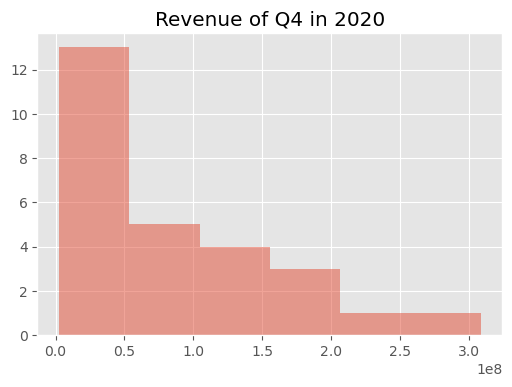

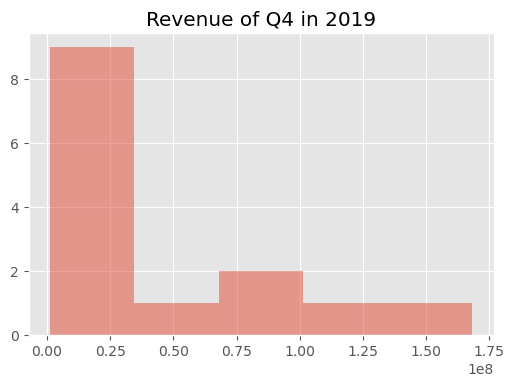

In [11]:
_ = plt.hist(before, bins = 'auto', alpha=0.5)
plt.title('Revenue of Q4 in 2020')
plt.show()

_ = plt.hist(after, bins = 'auto', alpha=0.5)
plt.title('Revenue of Q4 in 2019')
plt.show()

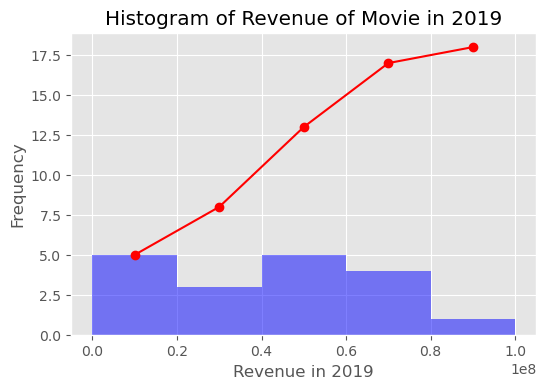

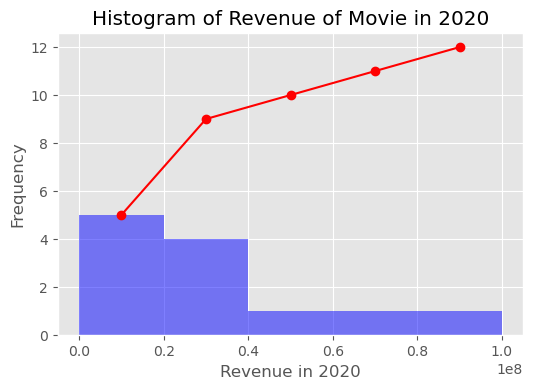

In [12]:
# the histogram of the data
bins_list = [0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(before, bins=bins_list, density=False, facecolor='b', alpha=0.5)
plt.xlabel('Revenue in 2019')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue of Movie in 2019')
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

# the histogram of the data
bins_list = [0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(after, bins=bins_list, density=False, facecolor='b', alpha=0.5)
plt.xlabel('Revenue in 2020')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue of Movie in 2020')
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

Áî±‰ª•‰∏äÁöÑÈï∑Ê¢ùÂúñÔºåÊàëÂÄëÂèØ‰ª•Ë™çÂÆöÂÖ©Ë≥áÊñôÈùûÂ∏∏ÊÖãÂàÜ‰ΩàÔºåÂõ†Ê≠§‰ΩøÁî® Wilcoxon Rank Sum Test„ÄÇ

+ $H_0:$ The locations of the two populations are the same. <br>
+ $H_1:$ The locations of before_covid(2019/10 - 2019/12) is greater than after_covid(2020/10 - 2020/12).

In [13]:
stats.mannwhitneyu(before , after , alternative = 'greater')

MannwhitneyuResult(statistic=266.0, pvalue=0.017723946276230383)

Áî±Ê™¢ÂÆöÁµêÊûúÁôºÁèæ p-value < 0.05ÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•ÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºåÊé®Ë´ñ‰∏ÄÁõ¥Âà∞2020/10Á¨¨ÂõõÂ≠£ÂæåÁöÑÈõªÂΩ±Á•®Êàø‰æùÁÑ∂ÂèóÂà∞ÂΩ±Èüø„ÄÇËã•Â∞á‰ø°ÂøÉÊ∞¥Ê∫ñË™øÊï¥Ëá≥0.01ÔºåÂâáÊúÉÈ°ØÁ§∫Ê≤íÊúâÂ∑ÆÁï∞ÔºåÂõ†Ê≠§ÊàëÂÄëË™çÁÇ∫ÈõªÂΩ±Á•®Êàø‰∏ÄÁõ¥Âà∞2020Âπ¥Â∫ï‰πãÂæåÔºåÂ∞±ÊúâÂõûÁ©©ÁöÑË∂®Âã¢„ÄÇ

ÊàëÂÄëÊé•ËëóÊãø 2020/07 - 2020/09 ÁöÑË≥áÊñôËàá 2020/10 - 2020/12 ÊØîËºÉÔºåÁ¢∫Ë™çÊòØÂê¶ÊúâÂõûÁ©©ÁöÑË∂®Âã¢„ÄÇ

In [14]:
covid_df_t1 =  covid_df[((covid_df.release_date >= '2020-07-01') & (covid_df.release_date <= '2020-09-30'))]
covid_df_t2 =  covid_df[((covid_df.release_date >= '2020-10-01'))]
covid_revenue = {'phase1': covid_df_t1.revenue.dropna().reset_index().revenue,
                 'phase2' : covid_df_t2.revenue.dropna().reset_index().revenue}
covid_df_revenue = pd.DataFrame(covid_revenue)
display(covid_df_revenue.head())
display(covid_df_revenue.tail())

phase1 = covid_df_revenue['phase1'].dropna().values
phase2 = covid_df_revenue['phase2'].dropna().values

phase1     phase2
0  39657073.0    1070714
1  39238300.0   15104310
2  47800000.0  168285000
3   4700000.0   25814306
4  45534613.0   12886100

phase1    phase2
9      NaN   6416063
10     NaN  47019435
11     NaN  30763855
12     NaN  76706000
13     NaN  80648577

+ $H_0:$ The locations of the two populations are the same. <br>
+ $H_1:$ The locations of phase1(2020/7 - 2020/9) is less than phase2(2020/10 - 2020/12).

In [15]:
stats.mannwhitneyu(phase1 , phase2 , alternative = 'less')

MannwhitneyuResult(statistic=45.0, pvalue=0.397001340096381)

Áî±Ê™¢ÂÆöÁµêÊûúÁôºÁèæ p-value > 0.05ÔºåÂõ†Ê≠§ÊàëÂÄë‰∏çÂèØ‰ª•ÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºåÊé®Ë´ñ‰∏ÄÁõ¥Âà∞2020/10Á¨¨ÂõõÂ≠£ÂæåÁöÑÈõªÂΩ±Á•®ÊàøÁõ∏ËºÉÊñºÁ¨¨‰∏âÂ≠£Â∑≤ÊúâÂ•ΩËΩâÔºå‰∏çÈÅéÂõ†ÁÇ∫Áñ´ÊÉÖÂæå‰πãÁ•®Êàø‰æùÁÑ∂ÂèóÂà∞ÂΩ±ÈüøÔºåÂõ†Ê≠§Êé•‰∏ã‰æÜÁöÑÂàÜÊûêÔºåÊàëÂÄëÂ∞áÂéªÈô§Áñ´ÊÉÖÂæåÁöÑË≥áÊñô„ÄÇ

## ‰∫å„ÄÅÁ•®ÊàøËàáÊäïÂÖ•ÊàêÊú¨ÁöÑÈóú‰øÇ

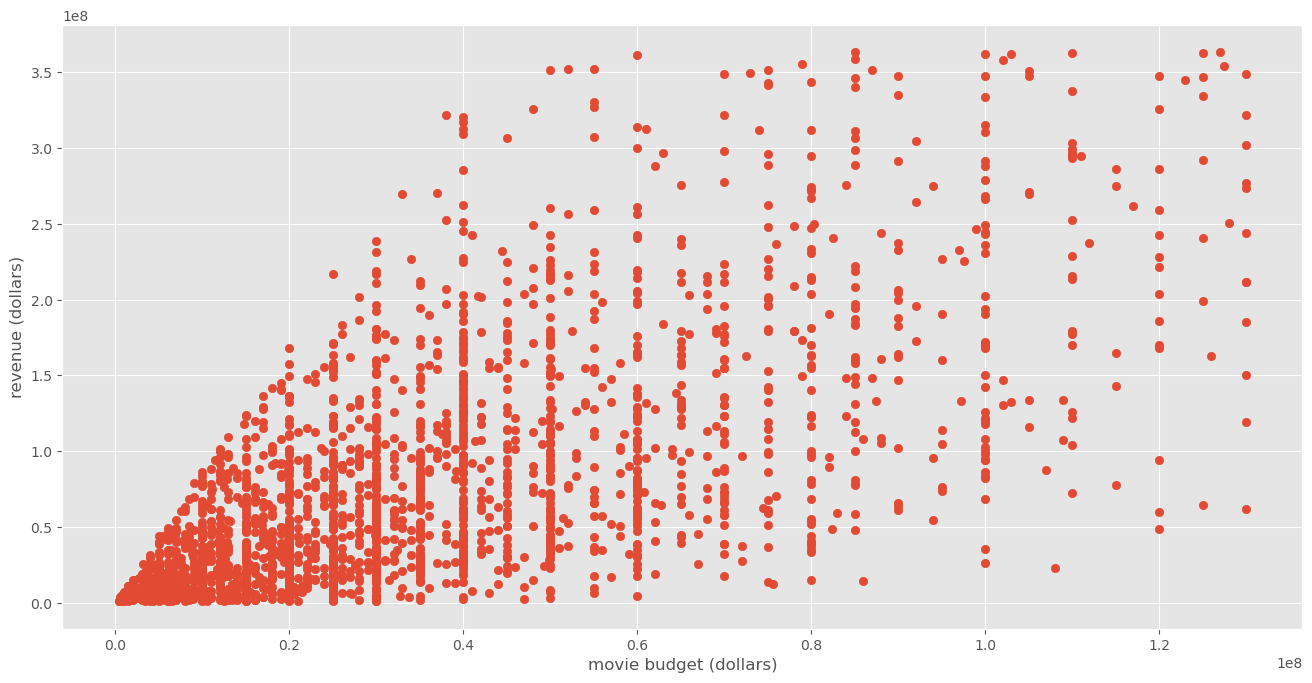

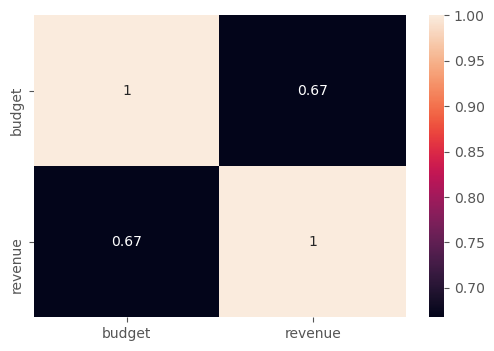

In [16]:
data_b_r = u_movie_df[['budget', 'revenue']]

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_b_r['budget'], data_b_r['revenue'])
ax.set_xlabel('movie budget (dollars)')
ax.set_ylabel('revenue (dollars)')
plt.show()

corr = data_b_r.corr()
_ = sns.heatmap(corr, annot=True)

Âæû‰ª•‰∏äÁöÑÊï£Â∏ÉÂúñÊàëÂÄëÂèØ‰ª•ÁúãË¶ãÂÖ∑ÂÇô‰∏ÄÂÆöÁ®ãÂ∫¶ÁöÑÁ∑öÊÄßÈóú‰øÇÔºåÊàëÂÄë‰ΩøÁî® Pearson Correlation of Coefficient test ‰æÜÈ©óË≠â„ÄÇ

ÂÖ©ËÆäÊï∏ budget, revenue ‰πãÈñìÁöÑÈóú‰øÇÁÇ∫ $\rho$ÔºåÁï∂ $\rho = 0$ ÊôÇÔºå‰ª£Ë°®ÈÅ∏ÂÆöÁöÑÂÖ©ËÆäÊï∏ÁÑ°Èóú„ÄÇ

+ $H_0$: $\rho = 0$<br>
+ $H_1$: $\rho \neq  0$

In [17]:
stats.spearmanr(data_b_r['budget'], data_b_r['revenue'])

SpearmanrResult(correlation=0.6924938298350513, pvalue=7.61e-321)

Áî±Ê™¢ÂÆöÁµêÊûúÁôºÁèæ p-value > 0.05ÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•ÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºåÊé®Ê∏¨ÊäïÂÖ•ÊàêÊú¨ËàáÁ•®ÊàøÁõ∏Èóú„ÄÇ

## ‰∏â„ÄÅÁ•®ÊàøËàáÂèÉÊºîËÄÖÁöÑÈóú‰øÇÔºöÁî∑Â•≥ÊºîÂì°ÁöÑÂ§öÂØ°ÊúÉ‰∏çÊúÉÂΩ±ÈüøÁ•®Êàø

Èö®ËëóÊÄßÂà•Âπ≥Ê¨äË≠∞È°å„ÄÅÂ•≥Ê¨äÊÑèË≠òÊä¨È†≠ÔºåË∂ä‰æÜË∂äÂ§ö‰∫∫Â∞çÊñºÈÄôÊ®£ÁöÑÊÄùÊΩÆË∂ä‰æÜË∂äÈóúÊ≥®„ÄÇ2017Âπ¥ÁöÑ#metooÈÅãÂãïÔºåÊõ¥ÊòØÊè≠Èú≤‰∫ÜÁæéÂúãÂΩ±Ë¶ñÁî¢Ê•≠Â∞çÊñºÂ•≥ÊÄßÁöÑÁ®ÆÁ®Æ‰∏çÂπ≥Á≠â„ÄÇ‰ª•Ê≠§ÁÇ∫ÁôºÊÉ≥ÔºåÊàëÂÄëÂ∏åÊúõÂèØ‰ª•Êé¢Á©∂ÔºöËßÄÁúæÂñúÂ•ΩÊòØÂê¶ÊúâÂèóÂà∞Ëá™19‰∏ñÁ¥ÄÂæåÊúüÈñãÂßãÁöÑÂ•≥Ê¨äÊÄùÊΩÆÂΩ±Èüø„ÄÇ

<div class="alert alert-block alert-info">
<b>üçø ‰Ω†Áü•ÈÅìÂóéÔºü</b><br>
    
Âú®2007Âπ¥Âà∞2012Âπ¥ÈñìÔºåÊúâÂè∞Ë©ûÁöÑÂ•≥ÊÄßËßíËâ≤ÊØî‰æãÂÉÖ‰Ωî30.8%</div>

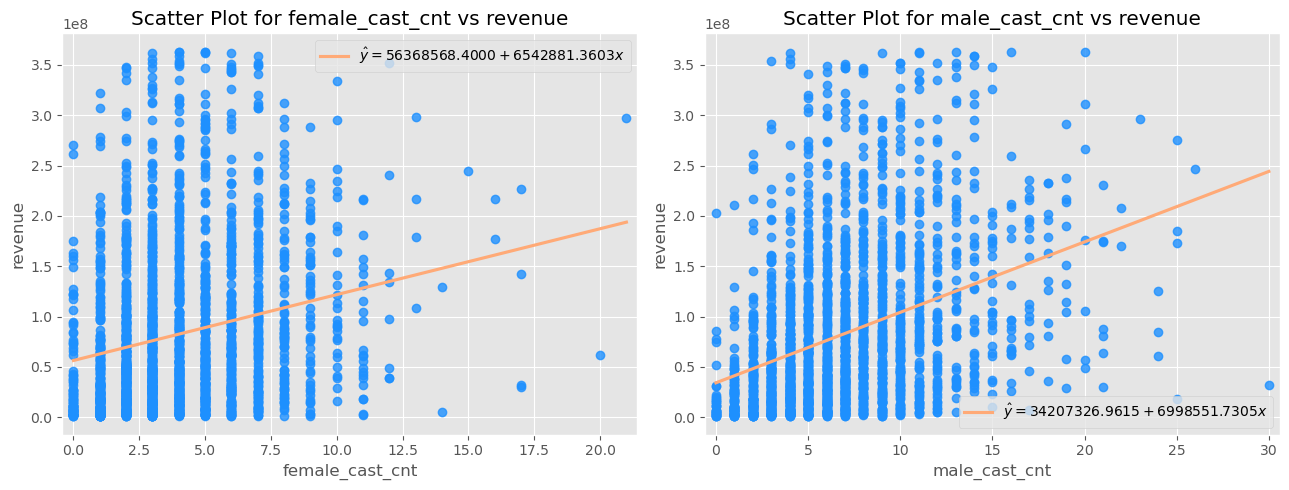

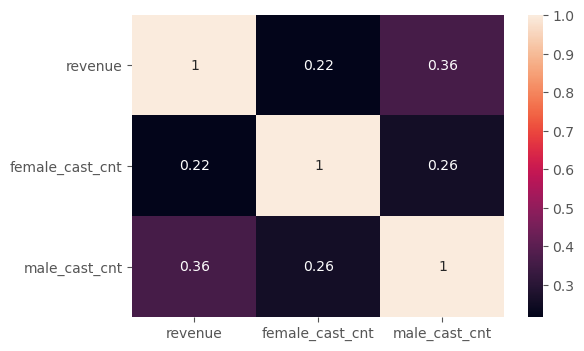

In [18]:
cast_gender = u_movie_df[['revenue', 'female_cast_cnt', 'male_cast_cnt']].copy()
cast_col = ['female_cast_cnt', 'male_cast_cnt']
mgt2001.model.multi_scatter_plot(1, 2, cast_gender, cast_col, 'revenue', figsize=(13, 5))

ÂèØ‰ª•Ëá™Êï£‰ΩàÂúñxËª∏Á∑öÁôºÁèæÔºåÁî∑ÊÄßÊºîÂì°Êï∏ÈáèÊòéÈ°ØÂ§ßÊñºÂ•≥ÊÄßÊºîÂì°Êï∏Èáè„ÄÇÁÑ∂ËÄåÈÄôÊ®£‰æùÁÑ∂ÁÑ°Ê≥ïÁúãÂá∫Â•≥ÊÄßÊºîÂì°Â∞çÊñºÈõªÂΩ±Á•®ÊàøÁöÑÂΩ±ÈüøÂäõÔºàÊºîÂì°Êï∏ÈáèÂ§öÔºåÊäïÂÖ•ÊàêÊú¨Áõ∏Â∞çËºÉÈ´òÔºåÊ†πÊìö‰∏ä‰∏ÄÂÄãÊ™¢ÂÆöÔºåÁ•®Êàø‰πüÁõ∏Â∞çËºÉÈ´òÔºâÔºåÂõ†Ê≠§ÊàëÂÄëÊ±∫ÂÆöÊé¢Á©∂ÔºöÂ•≥ÊÄßÊºîÂì°‰∏çÂ∞ëÊñºÁî∑ÊÄßÊºîÂì°ÁöÑÈõªÂΩ±ÔºåÁ•®ÊàøÊòØÂê¶ËºÉÈ´ò„ÄÇ

In [19]:
cast_gender["diff"] = cast_gender["female_cast_cnt"] - cast_gender["male_cast_cnt"]
print(cast_gender)   

m = cast_gender['diff'] > 0
positive, negative = cast_gender[m], cast_gender[~m]

        revenue  female_cast_cnt  male_cast_cnt  diff
0     161834276                8             12    -4
1     144056873                4              3     1
2      45554533                1              5    -4
3      28780255                2             12   -10
4     106371651                5              5     0
...         ...              ...            ...   ...
2243    6416063                1              8    -7
2244   47019435                2             10    -8
2245   30763855                3              4    -1
2246   76706000                1             12   -11
2247   80648577                3             13   -10

[2248 rows x 4 columns]


$t$-test:

+ $H_0$: $\mu_1 - \mu_2 = 0$
+ $H_1$: $\mu_1 - \mu_2 < 0$.

ÂÖ∂‰∏≠Ôºå
+ $\mu_1$: average revenue that female cast count is greater than male cast count
+ $\mu_2$: average revenue that female cast count is smaller than male cast count

Check normality first:

1. Áõ¥ÊñπÂúñ
2. ShapiroÊ™¢ÂÆö<br>

+ $H_0$: The population is normally distributed
+ $H_1$: The population is not normally distributed

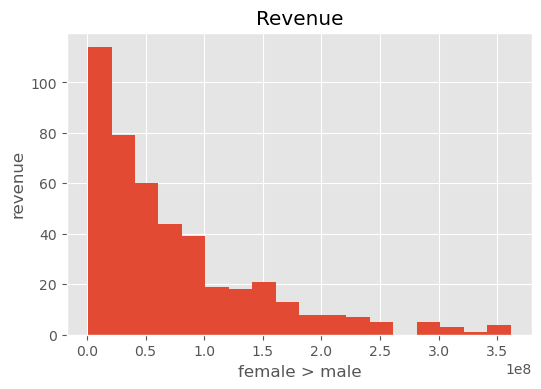

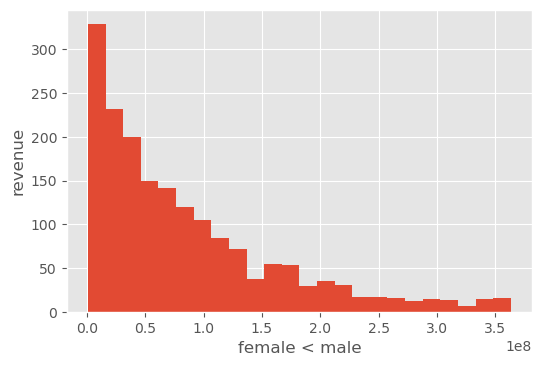

Sample 1:
ShapiroResult(statistic=0.8351048231124878, pvalue=3.655018705600595e-21)
Sample 2:
ShapiroResult(statistic=0.8552992343902588, pvalue=8.793742014187101e-38)


In [20]:
# ËΩâÊèõÊàênumpy array
sample1 = positive['revenue'].values
sample2 = negative['revenue'].values

# ÁßªÈô§nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#Ëá™Áî±Â∫¶Ë®àÁÆó
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

#Áï´histogramÁ¢∫Ë™çÊòØÂê¶Â∏∏ÊÖãÂàÜ‰Ωà
fig = plt.hist(sample1, bins = 'auto')
plt.title('Revenue')
plt.ylabel('revenue')
plt.xlabel("female > male")
plt.show()

fig = plt.hist(sample2, bins = 'auto')
plt.title('')
plt.ylabel('revenue')
plt.xlabel("female < male")
plt.show()

#Shapiro Test
print("Sample 1:")
print(stats.shapiro(sample1))
print("Sample 2:")
print(stats.shapiro(sample2))

Ê†πÊìö‰∏äÊñπÁöÑÁõ¥ÊñπÂúñÂíåShapiroÊ™¢ÂÆöÁµêÊûú(p-value < 0.05ÔºåÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºâÔºåÊàëÂÄëÂèØ‰ª•Êé®Ê∏¨Ë≥áÊñô‰∏çÊòØÂ∏∏ÊÖãÂàÜ‰Ωà„ÄÇ

Âõ†Ê≠§ÔºåÊàëÂÄëÊîπ‰ΩøÁî®Wilcoxon Rank Sum test.

$H_0$: The two population locations are the same <br>
$H_1$: The location of the population 1 is to the right of the location of population 2.

population 1: average revenue that female cast count is greater than male cast count<br>
population 2: average revenue that female cast count is smaller than male cast count

In [21]:
stats.ranksums(positive['revenue'], negative['revenue'])

RanksumsResult(statistic=-2.64763605182215, pvalue=0.008105673661706355)

Áî±‰∏äËø∞Ê™¢ÂÆöÁµêÊûúÔºàp-vlaue < 0.05)ÔºåÊàëÂÄëÂèØ‰ª•ÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºåÂèØ‰ª•Êé®Ë´ñÁï∂Â•≥ÊÄßÊºîÂì°Êï∏ÈáèÂ§ßÊñºÁî∑ÊÄßÊºîÂì°Êï∏ÈáèÊôÇÔºåÁ•®ÊàøËºÉÈ´ò„ÄÇ

## Âõõ„ÄÅË©ïÂàÜÁ∂≤Á´ôÁöÑÂ∑ÆÁï∞Ôºö

#### 1. ÂΩ±Ë©ï‰∫∫ËàáÂ§ßÁúæË©ïÂàÜÂ∑ÆÁï∞ÊØîËºÉÔºö

ÈõªÂΩ±Ë©ïÂàÜÁ∂≤Á´ôRotten TomatoÊúâË®±Â§öË©ïÂàÜÊ©üÂà∂ÔºåÂÖ∂‰∏≠ÊúÄÂèóÂà∞ÁüöÁõÆÁöÑÂÖ©ÂÄãÂàÜÂà•ÊòØ„ÄåÂΩ±Ë©ï‰∫∫ÁöÑË©ïÂàÜ„ÄçËàá„ÄåÂ§ßÁúæÁöÑË©ïÂàÜ„Äç„ÄÇ‰ª•Ê≠§ÁÇ∫ÁôºÊÉ≥ÔºåÊàëÂÄëÊØîËºÉRotten Tomato‰∏äÂΩ±Ë©ï‰∫∫ËàáÂ§ßÁúæÁöÑË©ïÂàÜÊòØÂê¶Â≠òÂú®Â∑ÆÁï∞„ÄÇ 

In [22]:
df_compare_rating_1 = u_movie_df[['rotten_score', 'rotten_aud_score']].copy()
df_compare_rating_1 = df_compare_rating_1.dropna().reset_index()
print('Head of dataset:')
display(df_compare_rating_1.head())
print("Tail of dataset:")
display(df_compare_rating_1.tail())

Head of dataset:


index  rotten_score  rotten_aud_score
0      0          40.0              37.0
1      1          20.0              57.0
2      2          62.0              62.0
3      3          66.0              78.0
4      4          44.0              64.0

Tail of dataset:


index  rotten_score  rotten_aud_score
1916   2243          96.0              95.0
1917   2244          83.0              94.0
1918   2245          29.0              57.0
1919   2246          55.0              86.0
1920   2247          66.0              91.0

**Ê™¢Êü•Ë≥áÊñôÊòØÂê¶ÁÇ∫Â∏∏ÊÖãÂàÜ‰Ωà**

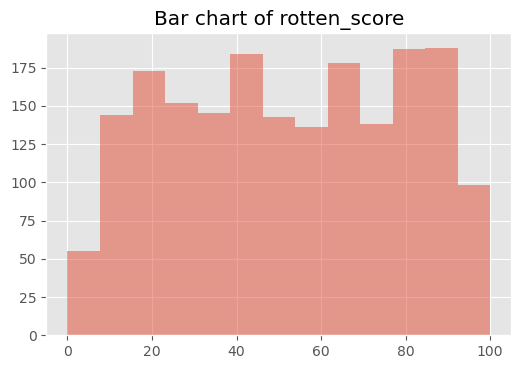

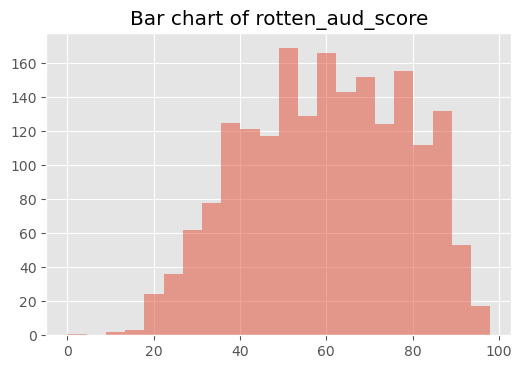

In [23]:
_ = plt.hist(df_compare_rating_1['rotten_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of rotten_score')
plt.show()

_ = plt.hist(df_compare_rating_1['rotten_aud_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of rotten_aud_score')
plt.show()

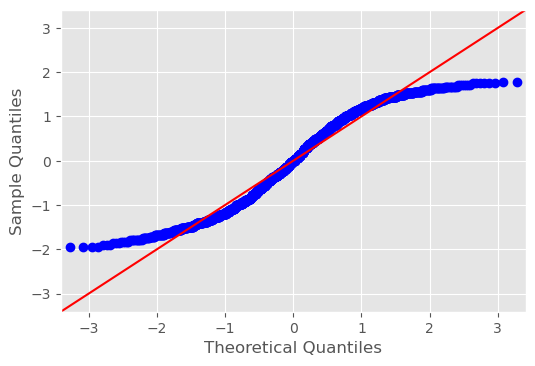

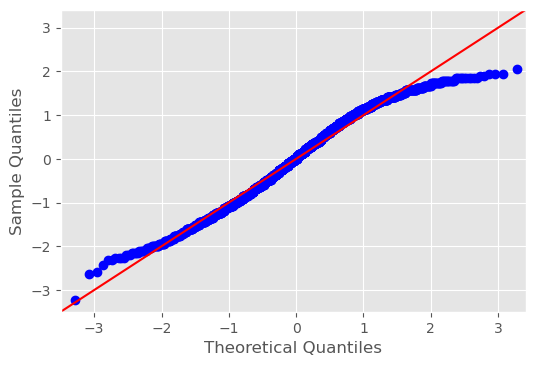

In [24]:
fig = sm.qqplot(df_compare_rating_1['rotten_score'], stats.norm, fit=True, line='45')
fig = sm.qqplot(df_compare_rating_1['rotten_aud_score'], stats.norm, fit=True, line='45')

ÂæûÁõ¥ÊñπÂúñÂíå Shapiro test ‰πãÂæåÔºåÊàëÂÄëË™çÂÆö rotten_score ÁÇ∫ÈùûÂ∏∏ÊÖãÂàÜ‰ΩàÔºårotten_aud_score ÁÇ∫Â∏∏ÊÖãÂàÜ‰ΩàÔºåÂõ†Ê≠§Êé°Áî® Wilcoxon Signed Rank Sum Test.

+ $H_0:$ The two population locations are the same
+ $H_1:$ The two population locations are NOT the same

In [25]:
stats.wilcoxon(df_compare_rating_1['rotten_score'], df_compare_rating_1['rotten_aud_score'], alternative='two-sided')

WilcoxonResult(statistic=523566.5, pvalue=1.952750775214582e-54)

Áî±Ê™¢ÂÆöÁµêÊûúÁôºÁèæ p-value < 0.05ÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•ÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºåÊé®Ë´ñÂ∞àÊ•≠ÂΩ±Ë©ï‰∫∫ËàáËßÄÁúæË©ïÂàÜ‰∏çÁõ°Áõ∏Âêå„ÄÇ

#### 2.‰∏çÂêåÂπ≥Âè∞ÈñìËßÄÁúæË©ïÂàÜÊØîËºÉ: TMDB vs Rotten Tomato

ÊàëÂÄëÂ•ΩÂ•áÈáùÂ∞çÂêå‰∏ÄÈÉ®ÈõªÂΩ±Âú®‰∏çÂêåÂπ≥Âè∞‰∏äÁöÑËßÄÁúæË©ïÂàÜÊòØÂê¶ÊúâÂ∑ÆÁï∞ÔºåÂõ†Ê≠§ÊØîËºÉÁàõÁï™ËåÑËßÄÁúæË©ïÂàÜÂèäTMDb‰∏äÁöÑËßÄÁúæË©ïÂàÜÁµêÊûúÊòØÂê¶Áõ∏Âêå„ÄÇ

In [26]:
df_compare_rating_2 = u_movie_df[['TMDB_score','rotten_aud_score']].copy()
df_compare_rating_2 = df_compare_rating_2.dropna().reset_index()
df_compare_rating_2['TMDB_score'] = df_compare_rating_2['TMDB_score']*10 
print('Head of dataset:')
display(df_compare_rating_2.head())
print("Tail of dataset:")
display(df_compare_rating_2.tail())

Head of dataset:


index  TMDB_score  rotten_aud_score
0      0        59.0              37.0
1      1        64.0              57.0
2      2        65.0              62.0
3      3        67.0              78.0
4      4        64.0              64.0

Tail of dataset:


index  TMDB_score  rotten_aud_score
1916   2243        75.0              95.0
1917   2244        85.0              94.0
1918   2245        71.0              57.0
1919   2246        76.0              86.0
1920   2247        79.0              91.0

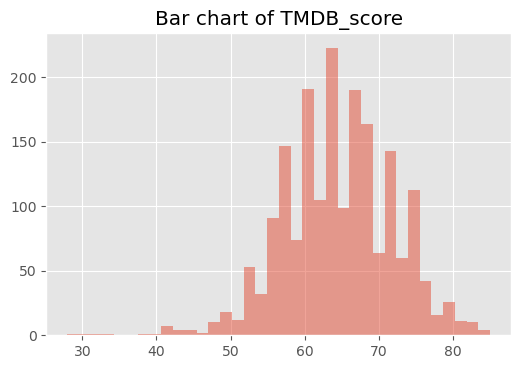

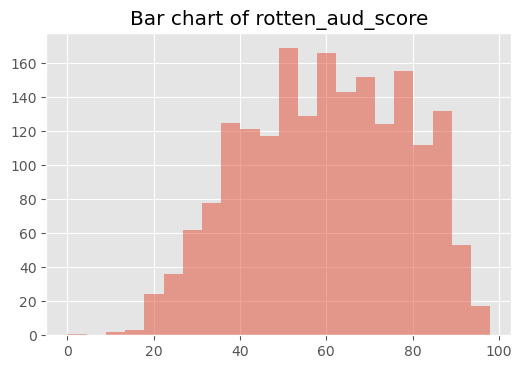

In [27]:
_ = plt.hist(df_compare_rating_2['TMDB_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of TMDB_score')
plt.show()

_ = plt.hist(df_compare_rating_2['rotten_aud_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of rotten_aud_score')
plt.show()

ÂæûÈï∑Ê¢ùÂúñÊàëÂÄëË™çÂÆöÂÖ©ÁµÑË≥áÊñôÁÇ∫Â∏∏ÊÖãÂàÜ‰Ωà„ÄÇ

Let 'TMDB_score' be $\mu_1$, 'rotten_aud_score' be $\mu_2$, and $\mu_D = \mu_1 - \mu_2$.

+ $H_0$: $\mu_D = 0$
+ $H_1$: $\mu_D \ne 0$

In [28]:
alpha = 0.05
# use matched-pair experiment
# t-test & estimator of mu_D
rotten = df_compare_rating_2['TMDB_score'].values
aud = df_compare_rating_2['rotten_aud_score'].values

diff = rotten - aud
nobs = diff.shape[0]
df = nobs - 1
print("degree of freedom = ", df)

diff_desc = stats.describe(diff)
t_value = (diff_desc.mean - 0) / (diff_desc.variance ** 0.5) * (nobs ** 0.5)
print(f"t-value = {t_value:.4f}")

#p-values
ptmp = stats.t.cdf(t_value, df)
p_value = 2 * (1 - ptmp)
print(f"p_value (two tail) = {p_value:.4f}")

degree of freedom =  1920
t-value = 15.6619
p_value (two tail) = 0.0000


Áî±Ê™¢ÂÆöÁµêÊûúÁôºÁèæ p-value < 0.05ÔºåÂõ†Ê≠§ÊàëÂÄëÂèØ‰ª•ÊãíÁµïËôõÁÑ°ÂÅáË®≠ÔºåÊé®Ë´ñTMDBÂíåRotten TomatoÂÖ©ËÄÖË©ïÂàÜ‰∏çÁõ°Áõ∏Âêå„ÄÇ

#### 3. ËßÄÁúæË©ïÂàÜËàáÈõªÂΩ±È°ûÂà•ÁöÑÈóú‰øÇ

ÊàëÂÄëË™çÁÇ∫ËßÄÁúæË©ïÂàÜÊôÇÔºå‰∏çÂè™ÊúÉËÄÉÈáèÈõªÂΩ±‰ΩúÂìÅÊú¨Ë∫´ÁöÑÂÖßÂÆπÔºå‰πüÊúâÂèØËÉΩÂõ†ÁÇ∫ÈõªÂΩ±È°ûÂà•ËÄåÊúâÊâÄÂÅèÈ†óÔºåÂ∞éËá¥ÁâπÂÆöÈ°ûÂà•ÁöÑÈõªÂΩ±Ë©ïÂàÜËºÉÈ´òÊàñËºÉ‰Ωé„ÄÇ

In [29]:
movie_gen_dummy = pd.read_csv('../data/movie_gen_dummy.csv', index_col=0)
movie_gen_dummy.dropna(inplace=True)

movie_gen_df = movie_gen_dummy.copy()
movie_gen_df = movie_gen_df.loc[:, 'Action':]
movie_gen_df['rotten_aud_score'] = movie_gen_dummy['rotten_aud_score']
movie_gen_df['revenue'] = movie_gen_dummy['revenue']
movie_gen_df['release_date'] = movie_gen_dummy['release_date']
movie_gen_df['t'] = movie_gen_df.index
movie_gen_df.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       0          0          0       0      0            0      0       0   
1       0          1          0       0      0            0      1       0   
2       0          0          1       1      0            0      0       1   
3       0          0          0       0      1            0      1       0   
4       0          0          0       1      1            0      0       0   

   Fantasy  History  ...  Romance  Science Fiction  TV Movie  Thriller  War  \
0        0        0  ...        0                0         0         0    0   
1        0        0  ...        1                0         0         1    0   
2        0        0  ...        0                0         0         0    0   
3        0        0  ...        0                0         0         1    0   
4        0        0  ...        0                0         0         0    0   

   Western  rotten_aud_score    revenue  release_date  t  
0        0              37.0  161834276    2000-02-03  0  
1        0              57.0  144056873    2000-02-03  1  
2        0              62.0   45554533    2000-02-11  2  
3        0              78.0   28780255    2000-02-18  3  
4        0              64.0  106371651    2000-02-18  4  

[5 rows x 23 columns]

In [30]:
x_names = list(movie_gen_df.columns[:-4])
y_name = 'rotten_aud_score'

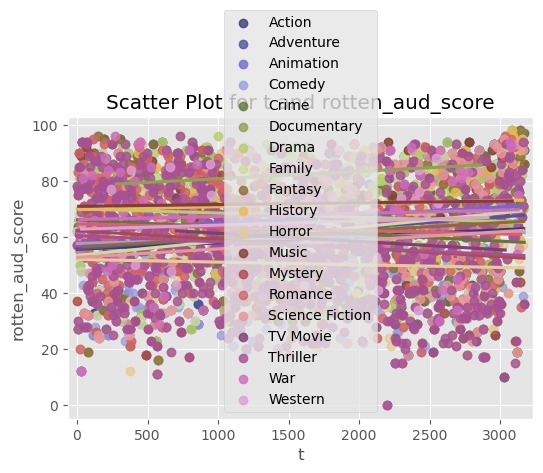

In [31]:
mgt2001.model.multi_variable_plot(x_name='t', y_name=y_name, df=movie_gen_df, x_names=x_names)

ÊàëÂÄëÂèØ‰ª•ÁôºÁèæÂéªÊéâ outlier ‰πãÂæåÔºåTV Movie ËÆäÂæóÈÉΩÊ≤íÊúâÂÄºÔºåÊñºÊòØÊàëÂÄëÂÖàÂ∞á TV Movie ÂæûÊàëÂÄëÁöÑx variables ÂéªÈô§„ÄÇ

In [32]:
x_names.remove('TV Movie')

In [33]:
mgt2001.model.multicollinearity(movie_gen_df, x_names, y_name)

In [34]:
# res_dict, assessment = mgt2001.model.MultipleRegression(x_names=x_names, y_name=y_name, df=movie_gen_df, assessment=False, t_test_c=0, t_test_option='two-tail')
# ÊàëË∑ëÂá∫‰æÜ‰∏çÁü•ÈÅìÁÇ∫‰ªÄÈ∫ºÊúÉÊúâerrorÔºåÂ∞±ÂÖàË∑≥ÈÅéÈÄô‰∏ÄÊÆµ‰∫Ü

### ‰∫î„ÄÅÁ•®ÊàøËàáÂéüÂßãË™ûË®ÄÁöÑÈóú‰øÇ

‰∏ÄÈÉ®ÈõªÂΩ±‰πãÂéüÂßãË™ûË®ÄÈÄöÂ∏∏ÊúÉÈÄ≤ËÄåÂΩ±ÈüøÂÖ∂È¢®Ê†º‰ª•ÂèäÁõÆÊ®ôÂÆ¢Áæ§ÔºåÂ∏åÊúõÂèØ‰ª•ÈÄèÈÅéÊ≠§ÂàÜÊûêÊé¢Ë®éËã•Ë©≤ÈõªÂΩ±‰πãÂéüÂßãË™ûË®ÄÁÇ∫‰∏ñÁïå‰∏äËºÉÂ§ö‰∫∫Âè£‰ΩøÁî®‰πãË™ûË®ÄÔºåÂÉèÊòØËã±ÊñáÔºåÊúÉ‰∏çÊúÉÂõ†ÁÇ∫ËºÉÂ§ö‰∫∫ËÅΩÂæóÊáÇÂéüÁâàËÄåÂª£Ê≥õÊµÅÂÇ≥„ÄÅÈÄ≤ËÄåÊèêÂçáÁ•®Êàø„ÄÇÊäëÊàñÊòØÊúâÁâπÂÆöË™ûË®Ä‰πãÈõªÂΩ±‰πãÁ•®ÊàøÁâπÂà•Á™ÅÂá∫„ÄÇ

In [35]:
language_df = u_movie_df[['original_language', 'revenue']].copy()
print("Head of data set:\n")
display(language_df.head())
print("Tail of data set:\n")
display(language_df.tail())

Head of data set:



original_language    revenue
0                en  161834276
1                en  144056873
2                en   45554533
3                en   28780255
4                en  106371651

Tail of data set:



original_language   revenue
2243                en   6416063
2244                en  47019435
2245                en  30763855
2246                en  76706000
2247                en  80648577

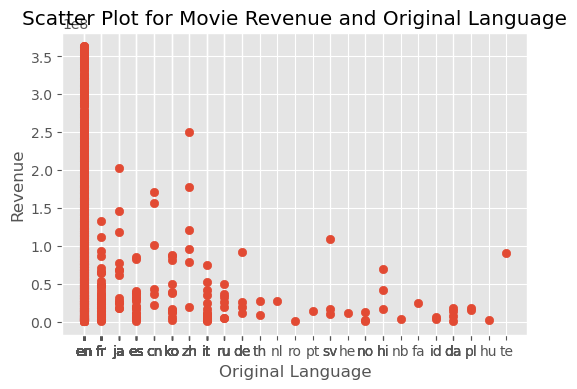

In [36]:
plt.scatter(language_df['original_language'], language_df['revenue'])
plt.title('Scatter Plot for Movie Revenue and Original Language')
plt.xlabel('Original Language')
plt.ylabel('Revenue')
plt.xticks(language_df['original_language'])
plt.show()

**Ê™¢Êü•Ë≥áÊñôÊòØÂê¶ÁÇ∫Â∏∏ÊÖãÂàÜ‰Ωà**

ËÄÉÈáèÂà∞ÈÉ®ÂàÜË™ûË®ÄÈõªÂΩ±‰πãË≥áÊñôÁ≠ÜÊï∏ < 3 „ÄÅÁÑ°Ê≥ïÈÄ≤Ë°å Shapiro Wilk's TestÔºå‰∏îË≥áÊñôÁ≠ÜÊï∏Â∞ëËºÉÈõ£ÁúüÂØ¶ÂëàÁèæË©≤Ë™ûË®ÄÈõªÂΩ±ÁöÑÁúüÂØ¶Á•®ÊàøÔºåÊïÖÂÖàÂ∞áÂÖ∂‰∫à‰ª•ÊéíÈô§

In [37]:
three_bound_index = list(language_df.groupby('original_language').count()[language_df.groupby('original_language').count()['revenue'] >= 3].index)
proper_lang_df = language_df[language_df['original_language'].apply(lambda x: x in three_bound_index)]
proper_lang_df

original_language    revenue
0                   en  161834276
1                   en  144056873
2                   en   45554533
3                   en   28780255
4                   en  106371651
...                ...        ...
2243                en    6416063
2244                en   47019435
2245                en   30763855
2246                en   76706000
2247                en   80648577

[2234 rows x 2 columns]

$H_0$: The population is normally distributed
$H_1$: The population is not normally distributed

In [38]:
treatment_name_list = proper_lang_df['original_language'].unique()
print(treatment_name_list)
anova.shapiro(proper_lang_df, treatment_name_list, 'original_language', 'revenue')
# anova.qq_plot(4, 4, proper_lang_df, treatment_name_list, 'original_language', 'revenue', figsize=(16, 16))

['en' 'fr' 'ja' 'es' 'cn' 'ko' 'zh' 'it' 'ru' 'de' 'sv' 'no' 'hi' 'da']
1: Statistics=0.8622, p=0.0000
2: Statistics=0.7991, p=0.0000
3: Statistics=0.8380, p=0.0200
4: Statistics=0.8156, p=0.0009
5: Statistics=0.8704, p=0.2276
6: Statistics=0.8520, p=0.0388
7: Statistics=0.9767, p=0.9340
8: Statistics=0.7753, p=0.0009
9: Statistics=0.9471, p=0.7028
10: Statistics=0.7685, p=0.0567
11: Statistics=0.7945, p=0.1014
12: Statistics=0.7951, p=0.1030
13: Statistics=0.9992, p=0.9467
14: Statistics=0.9850, p=0.9307


ÈõñÁÑ∂Ê≤íÊúâÁ¨¶Âêà Required ConditionsÔºåÂõ†ÁÇ∫Èõ£‰ª•ÊØîËºÉÔºåÊâÄ‰ª•‰ªçÈÄèÈÅé One Way ANOVA ‰æÜÂπ´Âä©ÊàëÂÄëÈáêÊ∏ÖÈóú‰øÇ„ÄÇ

+ $H_0$: All population means are equal<br>
+ $H_1$: Not all population means are equal

In [39]:
results, aov_table, render_table, f_stat, p_value = anova.f_oneway(proper_lang_df, 'original_language', 'revenue')
display(aov_table)
print(f"p-value = {p_value:.4f}")

p-value: 1.5192931565984133e-11


sum_sq      df         F        PR(>F)
C(original_language)  4.882633e+17    13.0  6.191572  1.519293e-11
Residual              1.346675e+19  2220.0       NaN           NaN

p-value = 0.0000


In [40]:
mc = smm.MultiComparison(proper_lang_df['revenue'], proper_lang_df['original_language'])
print(mc.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
group1 group2    meandiff    p-adj       lower          upper      reject
-------------------------------------------------------------------------
    cn     da -78186062.3333    0.9 -246983944.8849  90611820.2183  False
    cn     de -51330565.0833    0.9 -220128447.6349 117467317.4683  False
    cn     en  -1745540.8449    0.9 -108657304.0201 105166222.3302  False
    cn     es -63415783.1515 0.8866 -183854096.6198  57022530.3168  False
    cn     fr -60845438.3177 0.8471 -172494743.0842  50803866.4488  False
    cn     hi -45222149.8333    0.9 -230130965.6986 139686666.0319  False
    cn     it -70414459.0686 0.7998  -194590110.612  53761192.4748  False
    cn     ja -20253176.9872    0.9 -149316283.5459 108809929.5716  False
    cn     ko -50784554.4167    0.9 -181534832.0162  79965723.1828  False
    cn     no    -82879404.5    0.9 -267788220.3652 102029411.3652  False
    cn     ru -63582420.4048    0.9  -

/Users/pochenyeh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning:

FixedFormatter should only be used together with FixedLocator



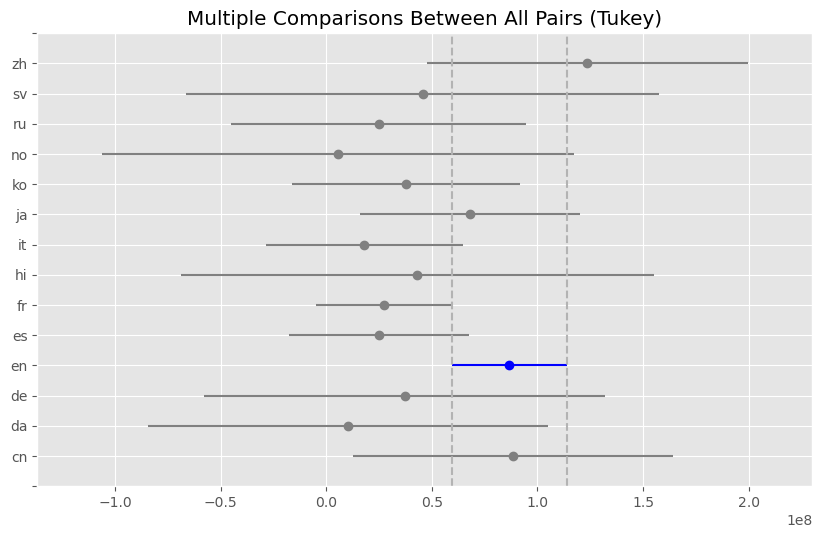

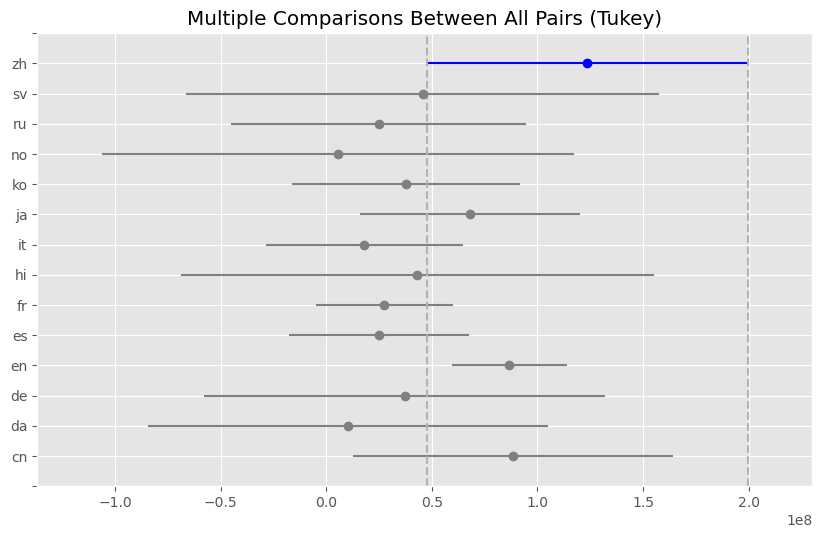

In [41]:
_ = mc.tukeyhsd().plot_simultaneous(comparison_name = "en")
_ = mc.tukeyhsd().plot_simultaneous(comparison_name = "zh")

Pairs `en` and `es`, `en` and `fr`, `en` and `it` can reject the null hypothesis under 5% confidence level. Moreover, by observing the graph above, we can know that the mean of `en` is larger than the mean of `es`, `fr`, `it`.

ÁµêÊûúÈ°ØÁ§∫ÂéüÂßãË™ûË®ÄÁÇ∫Ëã±ÊñáÁöÑÈõªÂΩ±Á•®ÊàøËºÉË•øÁè≠ÁâôË™û„ÄÅÊ≥ïË™û„ÄÅÁæ©Â§ßÂà©Ë™ûÈõªÂΩ±Â•ΩÁöÑÁãÄÊ≥ÅÔºå‰∏çÈÅéÂõ†ÁÇ∫Êï¥È´îË≥áÊñôÁ≠ÜÊï∏Â§™Êá∏ÊÆä„ÄÅÂπæ‰πéÈÉΩÊòØËã±ÊñáÁâáÊâÄ‰ª•ÊÑèÁæ©‰∏çÂ§ß„ÄÇ

ÁÇ∫Êõ¥‰∫ÜËß£ÂêÑÂéüÂßãË™ûË®ÄÈõªÂΩ±‰πãÁ•®ÊàøÂàÜ‰ΩàÔºåÁπ™Ë£Ω‰ª•‰∏ã Box Plot„ÄÇ

In [42]:
lan_list = proper_lang_df['original_language'].unique()

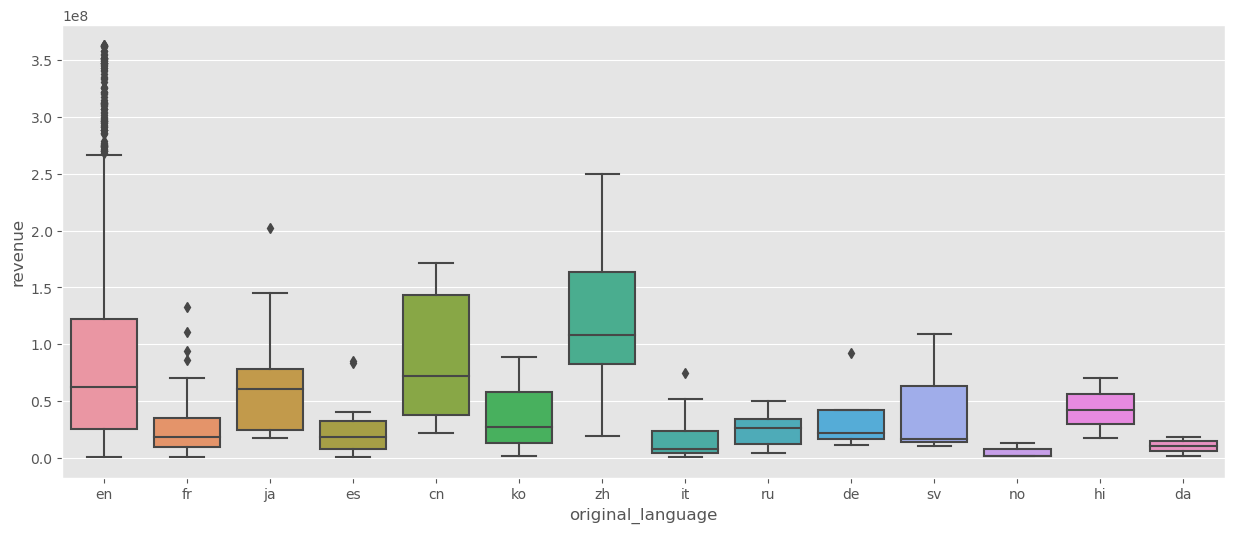

In [43]:
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x='original_language', y="revenue", data=proper_lang_df)
plt.show()

Âú®ÈÄôË£èÊàëÂÄë‰πüÂèØ‰ª•ÁúãÂà∞Ôºå‰∏≠ÊñáÈõªÂΩ±ÁöÑÂπ≥ÂùáÁ•®ÊàøË°®ÁèæÂÖ∂ÂØ¶‰πü‰∏çÂ∑Æ„ÄÇÁîöËá≥È´òÊñºËã±ÊñáÈõªÂΩ±ÁöÑÂπ≥ÂùáÁ•®Êàø„ÄÇ